In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
from pymatgen.electronic_structure.boltztrap2 import *

In [73]:
data = VasprunLoader().from_file('vasprun-PbTe_uniform_bs.xml')

/home/riccif/software/github/my_pymatgen/pymatgen/pymatgen/io/vasp/outputs.py:822: UserWarning: No POTCAR file with matching TITEL fields was found in /home/riccif/software/github/my_pymatgen/pymatgen/examples
  " was found in {}".format(os.path.abspath(p)))


# Interpolator

In [74]:
bztInterp = BztInterpolator(data)

In [32]:
sbs = bztInterp.get_band_structure()
type(sbs)

pymatgen.electronic_structure.bandstructure.BandStructureSymmLine

In [39]:
tot_dos = bztInterp.get_dos(T=200)
type(tot_dos)

pymatgen.electronic_structure.dos.Dos

In [121]:
tot_proj_dos = bztInterp.get_dos(partial_dos=True,T=200)

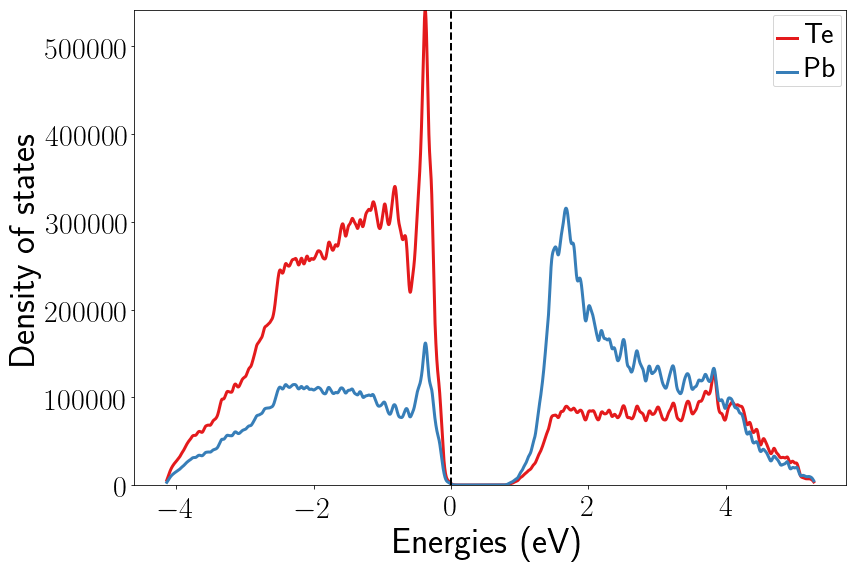

In [122]:
from pymatgen.electronic_structure.plotter import DosPlotter
pltdos = DosPlotter()
pltdos.add_dos_dict(tot_proj_dos.get_element_dos())
pltdos.show()

# Transport Properties

In [243]:
bztTransp = BztTransportProperties(bztInterp,temp_r = np.arange(100,1400,100))

/home/riccif/software/github/my_pymatgen/pymatgen/pymatgen/electronic_structure/boltztrap2.py:590: RuntimeWarning: divide by zero encountered in true_divide
  Hall_mu[:,:,1,2,0])/3)


In [244]:
print('Temp, energies, rows, columns tensor')
for p in bztTransp.Conductivity_mu, bztTransp.Seebeck_mu, bztTransp.Kappa_mu, \
         bztTransp.Effective_mass_mu, bztTransp.Power_Factor_mu, bztTransp.Carrier_conc_mu:
    print(p.shape)

Temp, energies, rows, columns tensor
(12, 3208, 3, 3)
(12, 3208, 3, 3)
(12, 3208, 3, 3)
(12, 3208, 3, 3)
(12, 3208, 3, 3)
(12, 3208)


In [245]:
bztTransp.compute_properties_doping(doping=10.**np.arange(16,23))

In [246]:
print('Temp, Doping, rows, columns tensor')
for p in bztTransp.Conductivity_doping, bztTransp.Seebeck_doping, bztTransp.Kappa_doping, \
         bztTransp.Effective_mass_doping, bztTransp.Power_Factor_doping:
    print(p['n'].shape)

Temp, Doping, rows, columns tensor
(12, 7, 3, 3)
(12, 7, 3, 3)
(12, 7, 3, 3)
(12, 7, 3, 3)
(12, 7, 3, 3)


# Plotter

In [247]:
bztPlotter = BztPlotter(bztTransp,bztInterp)

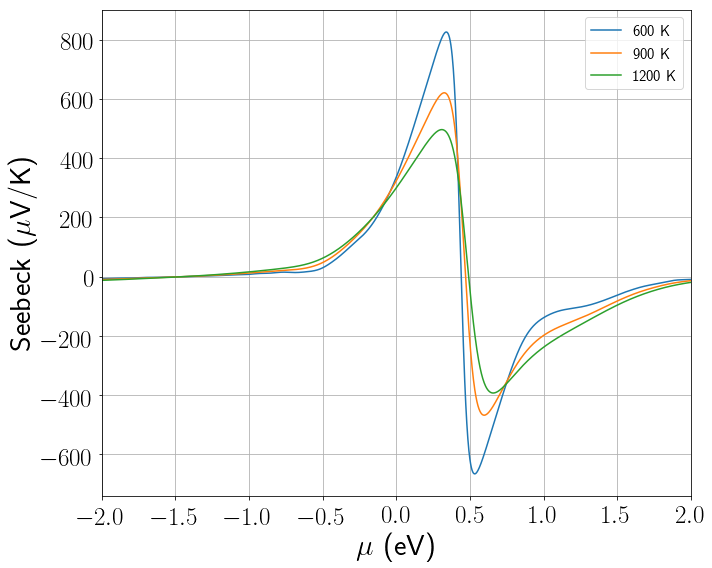

In [212]:
bztPlotter.plot_props('S','mu','temp',temps=[600,900,1200]).show()

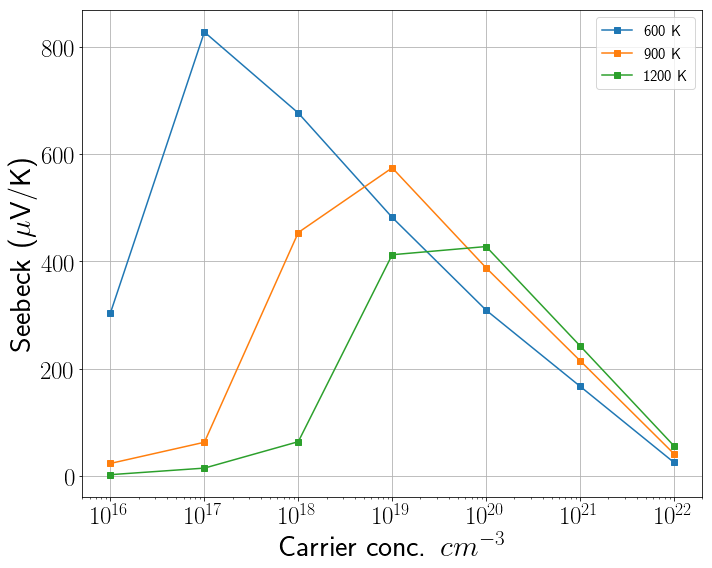

In [140]:
bztPlotter.plot_props('S','doping','temp', temps=[600,900,1200], dop_type='p').show()

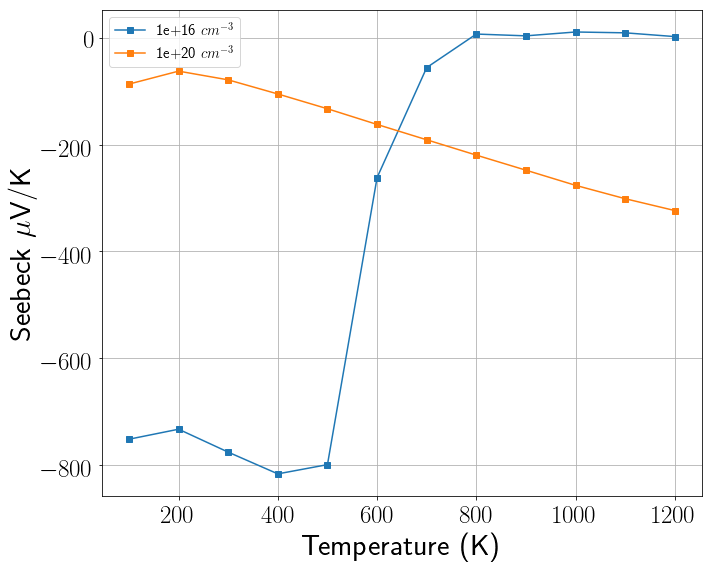

In [49]:
bztPlotter.plot_props('S','temp','doping',doping=[1e16,1e20], dop_type='n').show()

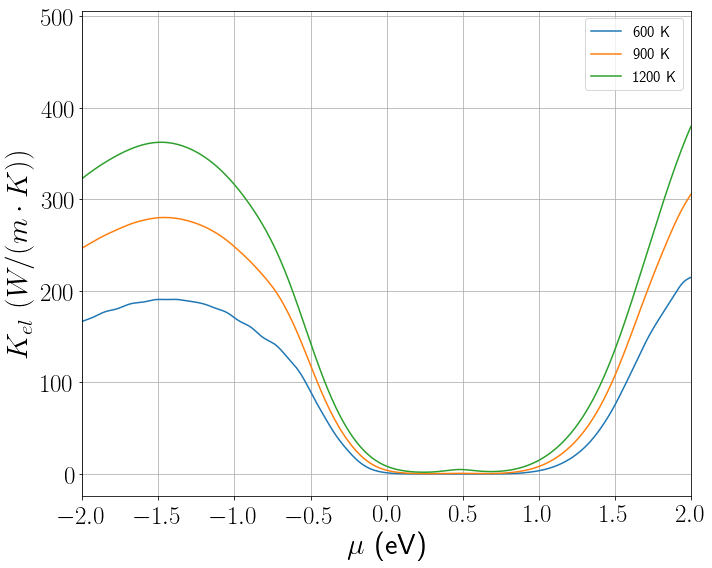

In [257]:
bztPlotter.plot_props('K','mu','temp',temps=[600,900,1200]).show()

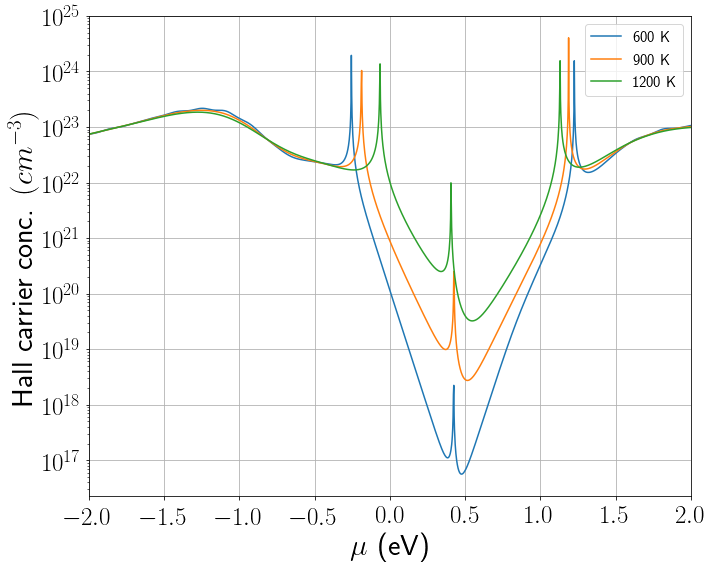

In [146]:
bztPlotter.plot_props('H','mu','temp',temps=[600,900,1200]).show()

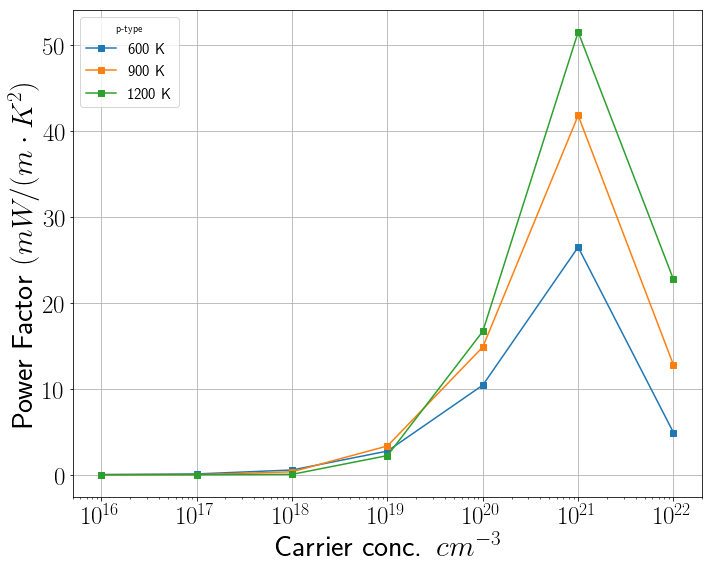

In [261]:
bztPlotter.plot_props('Po','doping','temp',temps=[600,900,1200],dop_type='p').show()

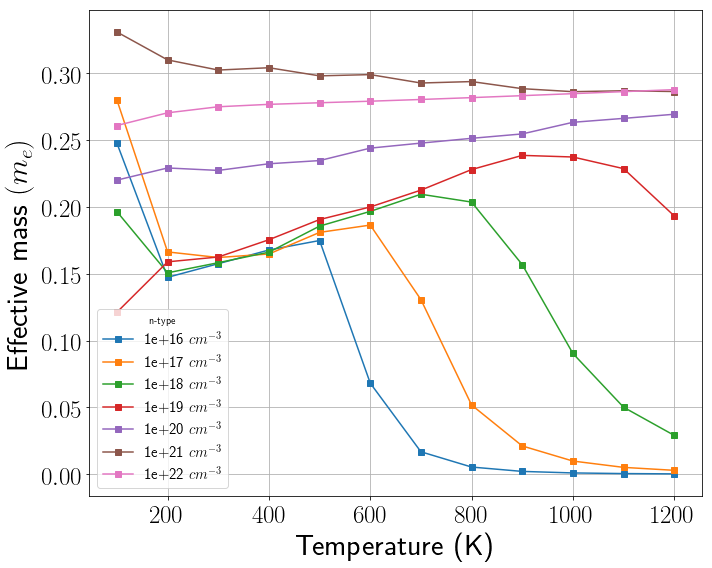

In [260]:
bztPlotter.plot_props('E','temp','doping').show()

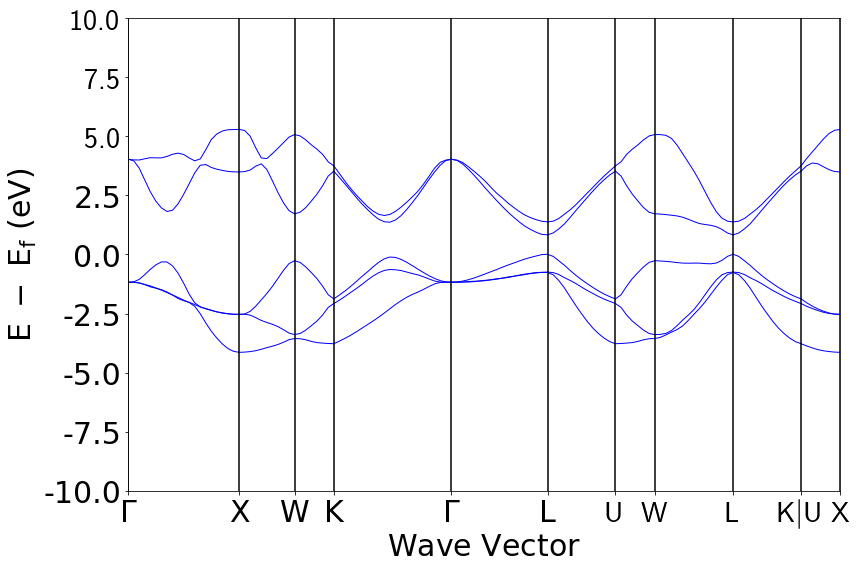

In [30]:
bztPlotter.plot_bands().show()

10000


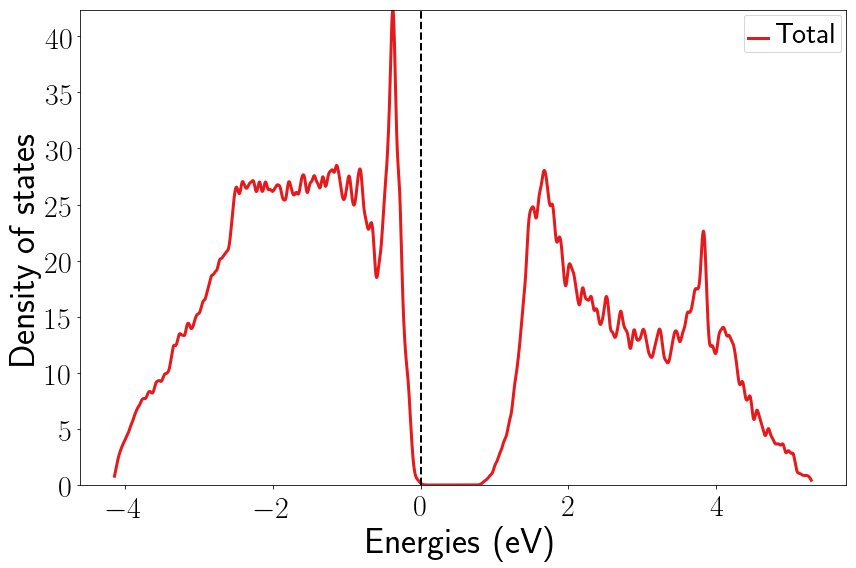

In [31]:
bztPlotter.plot_dos(T=200).show()